In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import gradio as gr

# Classification using Gaussian Probabilty

In [2]:
df2 = pd.read_csv("heart.csv") # https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

In [3]:
df2.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df2.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
# train, valid, test = np.split(df2.sample(frac=1), [int(0.6*len(df2)), int(0.8*len(df2))])
# i didn't use the validation set yet just made them for future use

In [5]:
train_valid, test = train_test_split(df2, test_size=0.2, random_state=42)

train, valid = train_test_split(train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2

In [6]:
# Preprocessing
x_train = train.drop('output', axis=1)
y_train = train['output']

x_valid = valid.drop('output', axis=1)
y_valid = valid['output']

x_test = test.drop('output', axis=1)
y_test = test['output']

In [7]:
# gaussian probability model
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train,y_train)

y_pred = nb_model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [10]:
#function used for gradio passes user input and typecasts the gradio objects into integers or floats, and creates a single instance data frame for prediction
def dinput(age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall):
        #mapping the user input into integers
        restecg_mapping = {
        "Value 0: normal": 0,
        "Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)": 1,
        "Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria": 2
    }
    
        cp_mapping = {
        "Value 1: typical angina": 0,
        "Value 2: atypical angina": 1,
        "Value 3: non-anginal pain": 2,
        "Value 4: asymptomatic": 3
    }
        gender_mapping = {
        "Male": 0,
        "Female": 1
    }       
        #boolean type casting 0 1
        exng = int(bool(exng))
        fbs = int(bool(fbs))

        #type casting the data into a dict, then transforming the dict to a data frame
        data = {
        'age':[int(age)],
        'sex':[gender_mapping.get(sex,0)],
        'cp':[cp_mapping.get(cp,0)],
        'trtbps':[int(trtbps)],
        'chol':[int(chol)],
        'fbs':[fbs],
        'restecg':[restecg_mapping.get(restecg,0)],
        'thalachh':[int(thalachh)],
        'exng':[exng],
        'oldpeak':[int(oldpeak)],
        'slp':[float(slp)],
        'caa':[int(caa)],
        'thall':[int(thall)]

    }
        

        df3 = pd.DataFrame(data)
        print(df3)

        #prediction
        y_pred2 = nb_model.predict(df3)
        return y_pred2

In [11]:
# gradio web platform
with gr.Blocks() as demo:
    with gr.Row():
        age = gr.Slider(minimum=18,maximum=100,step=1)
        sex = gr.Dropdown(choices=["Male","Female"],label="gender?")

        cp = gr.Dropdown(choices=["Value 1: typical angina","Value 2: atypical angina","Value 3: non-anginal pain","Value 4: asymptomatic"],label="type of angina")
        
        trtbps = gr.Slider(minimum=100,maximum=200,label="resting heart rate?",step=1)
        chol = gr.Slider(minimum=150,maximum=350,label="cholerstrol level",interactive=True,step=1)
        fbs = gr.Checkbox(label="is the paitient fasting sugar level >120mg ?")
        restecg = gr.Dropdown(choices=["Value 0: normal","Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)","Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"],label="resting electrocardiographic results?")
        thalachh = gr.Slider(maximum=200,minimum=100,label="maximum heart rate achieved?",step=1,)
        exng = gr.Checkbox(label="does the paitent have exercise induced angina")
        oldpeak = gr.Slider(minimum=0,maximum=6.2, step=0.1,label="previous peak")
        slp = gr.Slider(minimum=0,maximum=2,label="Slope",step=1)
        caa = gr.Slider(minimum=0,maximum=4,label="number of Major vessels",step=1)
        thall = gr.Slider(minimum=0,maximum=3,label="thall rate",step=1)
    with gr.Column():
        run = gr.Button("Run prediction")
        output2 = gr.Textbox(label=" Gaussian model classification")

    event = run.click(
        fn=dinput,
        inputs=[age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall],
        outputs=[output2]
    )

In [12]:
demo.launch(share=False)

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


   age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   18    0   0     100   150    0        0       100     0        0  0.0   

   caa  thall  
0    0      0  


# Linear Regression

In [6]:
cars_df =pd.read_csv("car.csv") # https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=CAR+DETAILS+FROM+CAR+DEKHO.csv

In [7]:
#preprocessing
cars_df["transmission"] = (cars_df["transmission"]=="Manual").astype(int)

In [8]:
cars_df["owner"] = pd.Categorical(cars_df["owner"]).codes
cars_df["nameINT"] = pd.Categorical(cars_df["name"]).codes
cars_df["sellerINT"] = pd.Categorical(cars_df["seller_type"]).codes
cars_df["fuelINT"] = pd.Categorical(cars_df["fuel"]).codes

In [9]:
cars_df = cars_df.sample(frac=1)

In [10]:
cars_df.head()
#before and after

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,nameINT,sellerINT,fuelINT
3678,Tata Indigo CR4,2012,135000,158000,Diesel,Individual,1,4,1244,1,1
1718,Hyundai Santro Xing GLS,2013,324000,30000,Petrol,Individual,1,0,476,1,4
3443,Chevrolet Cruze LTZ,2011,335000,90000,Diesel,Individual,1,2,63,1,1
909,Maruti S-Cross Zeta DDiS 200 SH,2015,750000,45974,Diesel,Trustmark Dealer,1,0,935,2,1
1360,Honda City i DTEC SV,2014,725000,110000,Diesel,Individual,1,0,319,1,1


In [11]:
%matplotlib inline
#Std_Scaler = StandardScaler() # i thought i would scale the data but i didn't know what i was doing if i did, in km_driven
#in km_driven graph below the data is focused in one area, i thought i would remove the outliers but i didn't know if it would
#make a difference, Standard Scaler doesnt do anything
cars_df2 = cars_df[["year","selling_price","km_driven","transmission", "owner","sellerINT",]]
cars_df2.head()
#after

#data was chosen based on linearty

,year,selling_price,km_driven,transmission,owner,sellerINT
3678,2012,135000,158000,1,4,1
1718,2013,324000,30000,1,0,1
3443,2011,335000,90000,1,2,1
909,2015,750000,45974,1,0,2
1360,2014,725000,110000,1,0,1


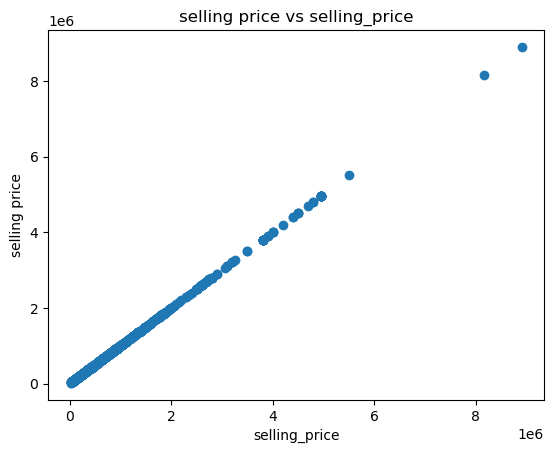

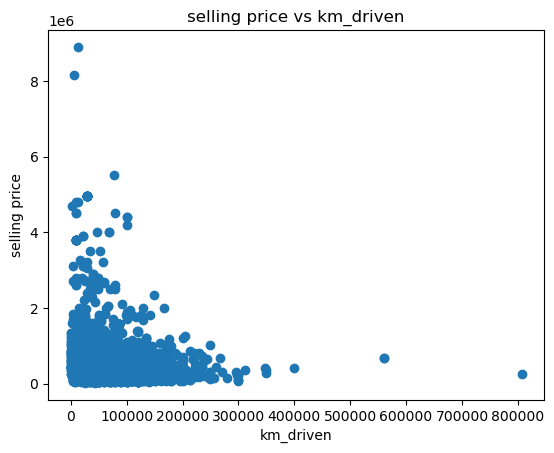

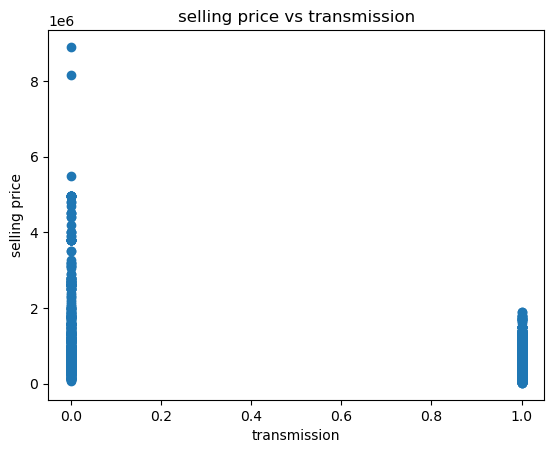

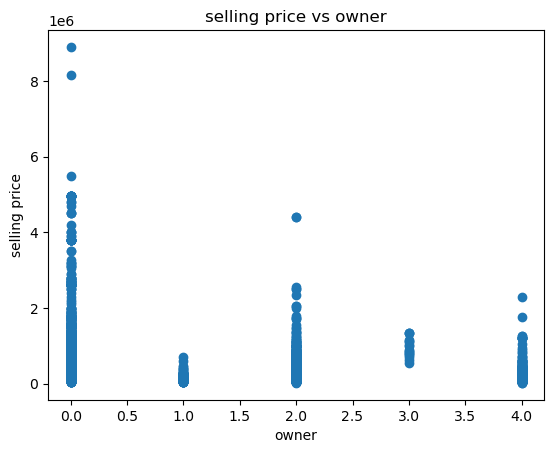

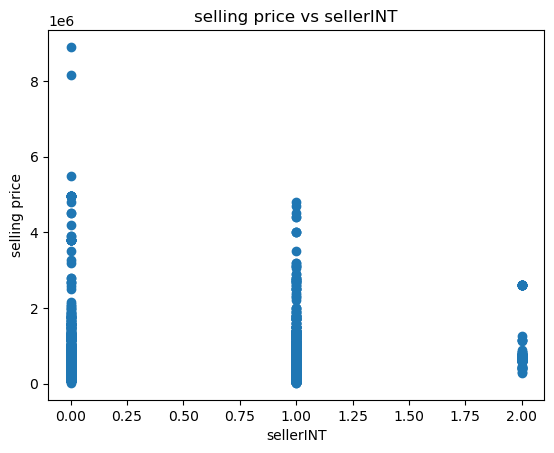

In [12]:
for col in cars_df2.columns[1:]:
    plt.scatter(cars_df2[col], cars_df2["selling_price"])
    plt.ylabel("selling price")
    plt.xlabel(col)
    plt.title("selling price vs " + col)
    plt.show()

In [95]:
cars_df3 = cars_df2.copy()
cars_df3 = cars_df3[cars_df3["km_driven"]<400000]
cars_df3 = cars_df3[cars_df3["selling_price"]<600000]
train_valid, test = train_test_split(cars_df3, test_size=0.2, random_state=42)
train, valid = train_test_split(train_valid, test_size=0.25, random_state=42)  # 0.25 * 0.8 = 0.2
cars_df3.describe()

,year,selling_price,km_driven,transmission,owner,sellerINT
count,3178.000000,3178.000000,3178.000000,3178.00000,3178.000000,3178.000000
mean,2011.993392,286695.895532,71220.068597,0.95343,0.984896,0.807111
std,4.180566,147403.631821,43664.946848,0.21075,1.297594,0.404086
min,1992.000000,20000.000000,1.000000,0.00000,0.000000,0.000000
25%,2009.000000,160000.000000,40000.000000,1.00000,0.000000,1.000000
50%,2012.000000,270500.000000,66000.000000,1.00000,0.000000,1.000000
75%,2015.000000,400000.000000,95000.000000,1.00000,2.000000,1.000000
max,2020.000000,599000.000000,350000.000000,1.00000,4.000000,2.000000


In [96]:
x_train = train.drop('selling_price', axis=1)
y_train = train['selling_price']

x_valid = valid.drop('selling_price', axis=1)
y_valid = valid['selling_price']

x_test = test.drop('selling_price', axis=1)
y_test = test['selling_price']

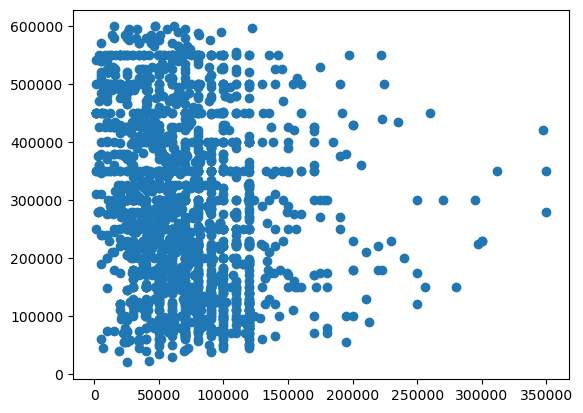

In [97]:

#norm = MinMaxScaler().fit(x_train[["km_driven"]])
#x_train["km_driven"] = norm.transform(x_train[["km_driven"]])
#x_test["km_driven"] = norm.transform(x_test[["km_driven"]])

plt.scatter(x_train["km_driven"],y_train)
plt.show()



In [98]:
lg_model = LinearRegression()
lg_model = lg_model.fit(x_train,y_train)

lg_model.score(x_test,y_test)  #the closer to 1 the better

0.45018834320966306

In [16]:
#gradio ml function
def lf_fn(name, year, km_driven, transmission, owner, seller):
    nameINT = cars_df.loc[cars_df["name"]==name,"nameINT"].values[0] #mapping the user input into the integer value of that input
    sellerINT = cars_df.loc[cars_df["seller_type"]==seller,"sellerINT"].values[0]
    year = int(year)
    km_driven = int(km_driven)
    transmission = int(transmission)
    owner = int(owner)
    
    data = {
        "year":[year],
        "km_driven":[km_driven],
        "transmission":[transmission],
        "owner":[owner],
        "sellerINT":[sellerINT]
        
        
    }
    y_predict = pd.DataFrame(data)
    y_predict = lg_model.predict(y_predict)
    return y_predict

In [17]:
with gr.Blocks() as demo2:
    with gr.Row():
        name = gr.Dropdown(choices=cars_df["name"].unique().tolist(),label="car name?")
        year = gr.Dropdown(choices=cars_df["year"].unique().tolist(),label="year?")
        km_driven = gr.Slider(minimum=0,maximum=300000,label="km driven?")
        tranmission = gr.Dropdown(choices=cars_df["transmission"].unique().tolist(), label="tranmission type?")
        owner = gr.Dropdown(choices=cars_df["owner"].unique().tolist(), label="how many owners")
        seller = gr.Dropdown(choices=cars_df["seller_type"].unique().tolist(),label="type of seller")
        
    with gr.Row():
        run = gr.Button("Run Prediction")
        outputp = gr.Textbox(label="prediction price would be")
    event = run.click(
        fn=lf_fn,
        inputs=[name,year,km_driven,tranmission,owner,seller],
        outputs=[outputp]
        
    )
        
        

In [29]:
demo2.launch(share=False)

Running on local URL:  http://127.0.0.1:7862

To create a public link, set `share=True` in `launch()`.
